In [ ]:
!unzip /content/drive/MyDrive/dataaa/hellooo.zip -d project

Archive:  /content/drive/MyDrive/dataaa/hellooo.zip
  inflating: project/classes.names   
  inflating: project/getting-full-path.py  
  inflating: project/test.txt        
  inflating: project/traffic-sign-to-test.mp4  
  inflating: project/train.txt       
  inflating: project/ts/ts/00000.jpg  
  inflating: project/ts/ts/00000.txt  
  inflating: project/ts/ts/00001.jpg  
  inflating: project/ts/ts/00001.txt  
  inflating: project/ts/ts/00002.jpg  
  inflating: project/ts/ts/00002.txt  
  inflating: project/ts/ts/00003.jpg  
  inflating: project/ts/ts/00003.txt  
  inflating: project/ts/ts/00004.jpg  
  inflating: project/ts/ts/00004.txt  
  inflating: project/ts/ts/00005.jpg  
  inflating: project/ts/ts/00005.txt  
  inflating: project/ts/ts/00006.jpg  
  inflating: project/ts/ts/00006.txt  
  inflating: project/ts/ts/00007.jpg  
  inflating: project/ts/ts/00007.txt  
  inflating: project/ts/ts/00008.jpg  
  inflating: project/ts/ts/00008.txt  
  inflating: project/ts/ts/00009.jpg  
 

In [ ]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15008, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15008 (delta 2), reused 2 (delta 0), pack-reused 15002
Receiving objects: 100% (15008/15008), 14.09 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (10293/10293), done.


In [ ]:
%cd yolov5/

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00


In [ ]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/project/dataset/images/train"
val_path = "/content/project/dataset/images/val"
crs_path = "/content/project/ts/ts"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  592
validation images are :  148


In [ ]:
len(imgs)

741

In [ ]:
train_image_path = "/content/project/dataset/images/train"
train_label_path = "/content/project/dataset/labels/train"
val_image_path = "/content/project/dataset/images/val"
val_label_path = "/content/project/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['00301.jpg'] ['00301.txt']


In [ ]:
!pip install googledrivedownloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1KtlDXpLCfqoklUTdrnVASNbxL_AK9qnx',
                                    dest_path='/content/project/dataset/dataset.yaml')

In [ ]:
with open(r'/content/project/dataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/project/dataset/images/train\n', 'val: /content/project/dataset/images/val\n', '\n', 'nc: 4\n', "names: ['speed limit','yield','mandatory','other']"]


In [ ]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 10 --data /content/project/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: wandb: command not found
train: weights=yolov5s.pt, cfg=, data=/content/project/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

In [ ]:
!python detect.py --source /content/project/dataset/images/val/00023.jpg --weights /content/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/project/dataset/images/val/00023.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/dataset/images/val/00023.jpg: 384x640 1 speed limit, 2 yields, 254.2ms
Speed: 0.9ms pre-process, 254.2ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp11


In [ ]:
!ls /content/yolov5/runs/detect/exp11

00023.jpg


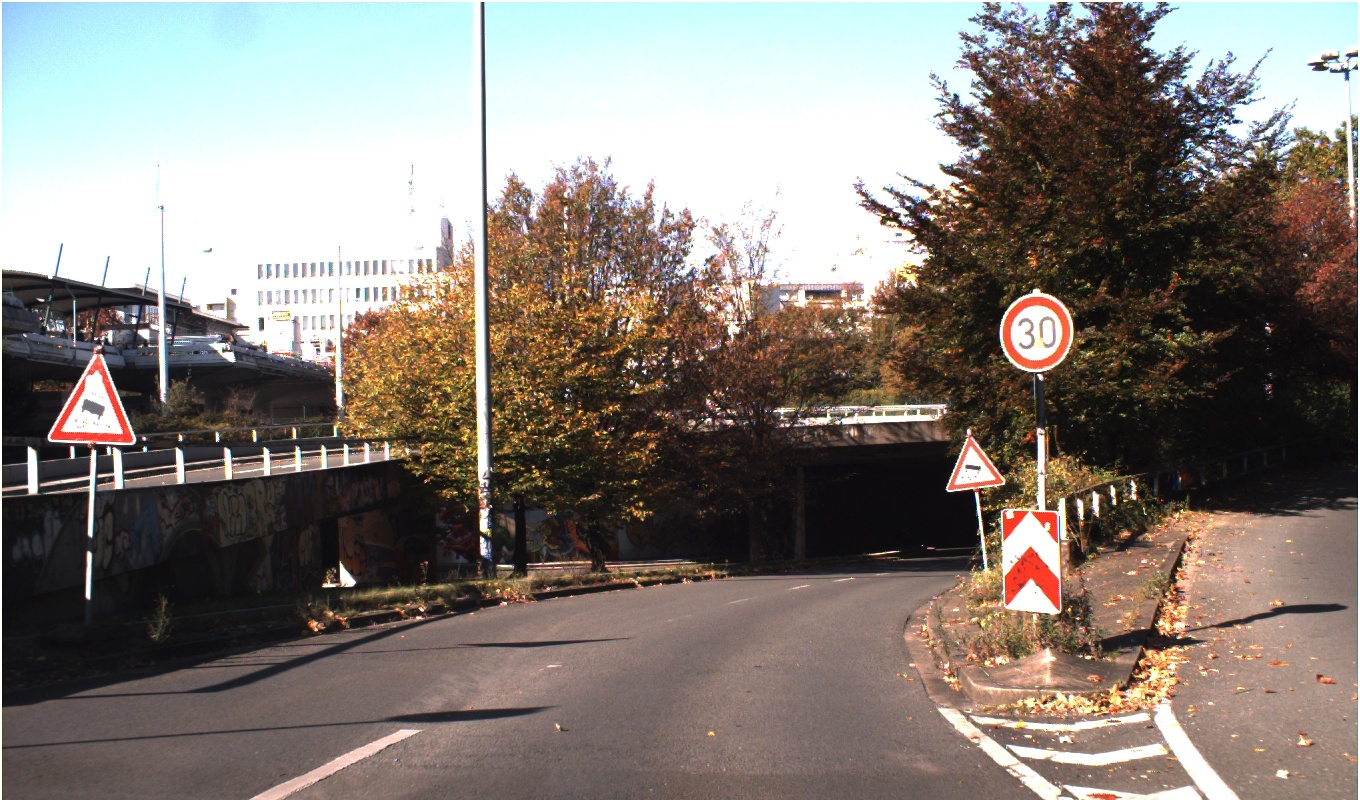

In [ ]:
Image(filename='/content/project/dataset/images/val/00023.jpg', width=416)

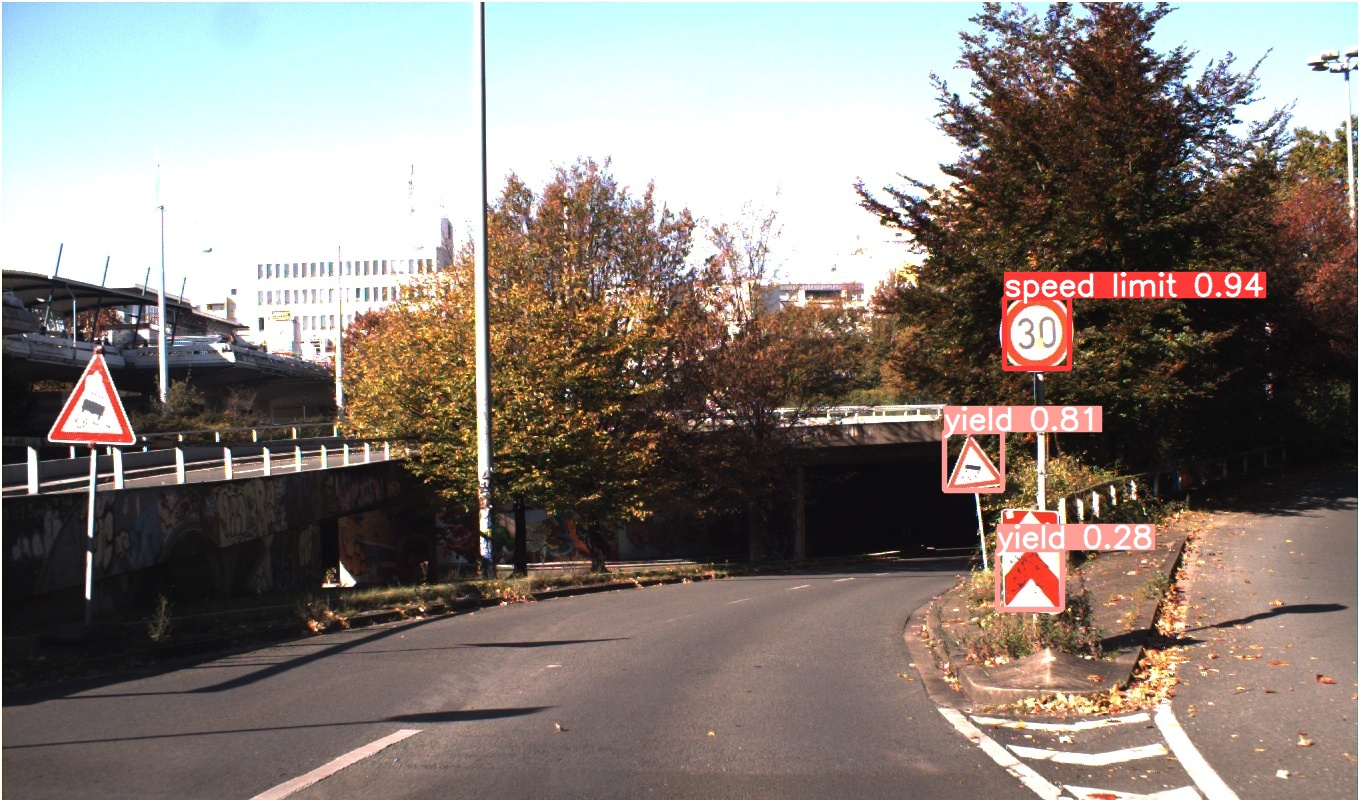

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp11/00023.jpg', width=416)

In [ ]:
!ls ../

classes.names	      traffic-sign-to-test.mp4	yolov3_ts_test.cfg
dataset		      train.txt			yolov3_ts_train.cfg
getting-full-path.py  ts			yolov5
test.txt	      ts_data.data


In [ ]:
!python detect.py --source /content/project/dataset/images/val/00101.jpg --weights /content/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/project/dataset/images/val/00101.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/dataset/images/val/00101.jpg: 384x640 1 speed limit, 212.9ms
Speed: 2.5ms pre-process, 212.9ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp12


In [ ]:
!ls /content/yolov5/runs/detect/exp12

00101.jpg


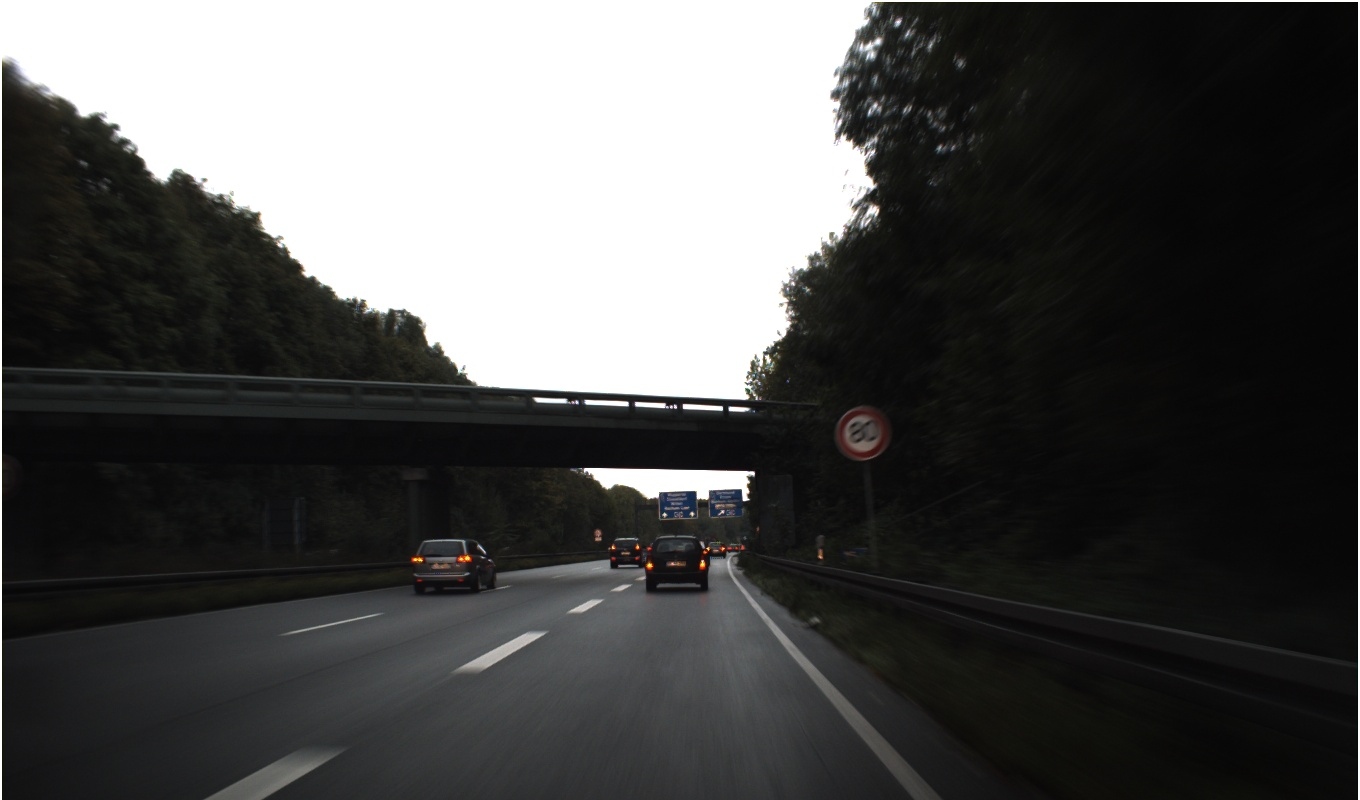

In [ ]:
Image(filename='/content/project/dataset/images/val/00101.jpg', width=416)

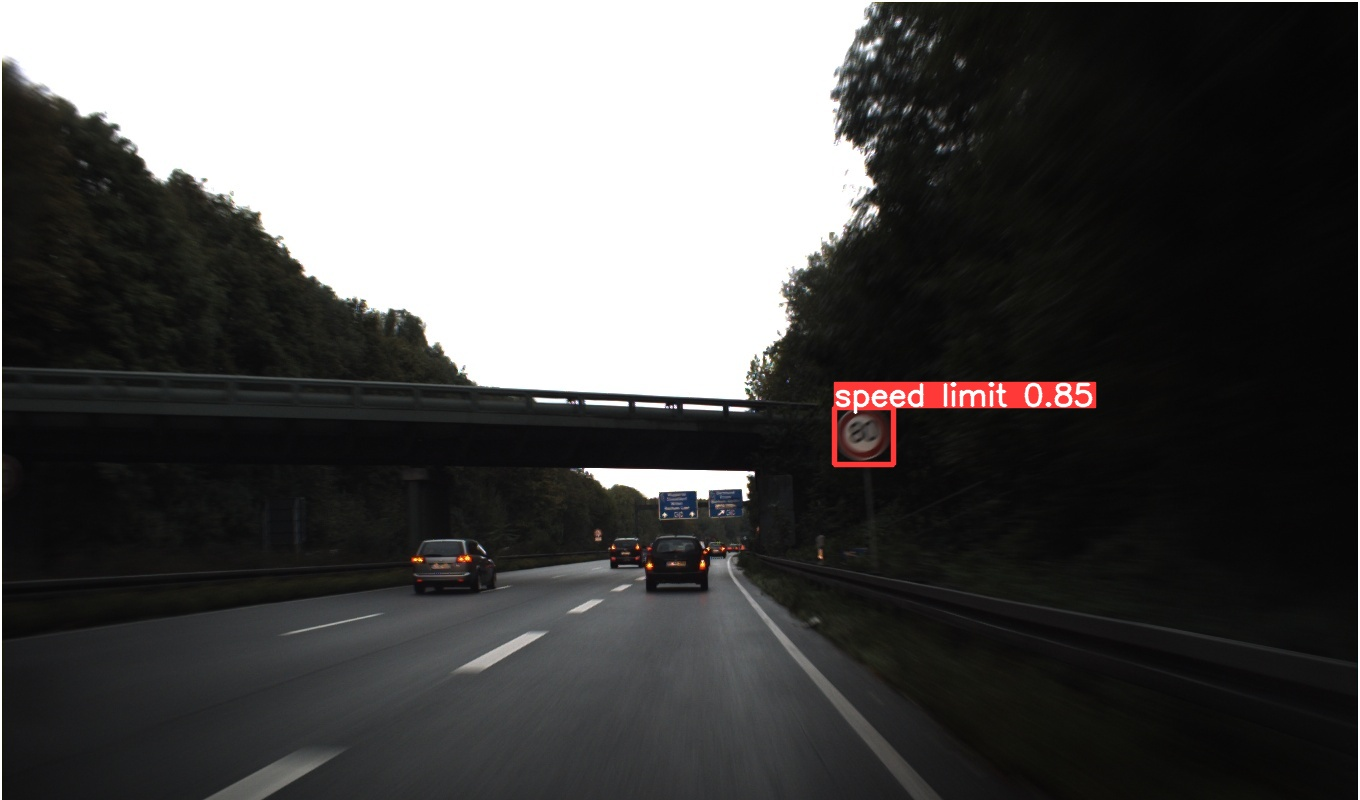

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp12/00101.jpg', width=416)

In [ ]:
!python detect.py --source /content/project/dataset/images/val/00896.jpg --weights /content/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/project/dataset/images/val/00896.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/dataset/images/val/00896.jpg: 384x640 1 speed limit, 218.8ms
Speed: 2.3ms pre-process, 218.8ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp13


In [ ]:
!ls /content/yolov5/runs/detect/exp13

00896.jpg


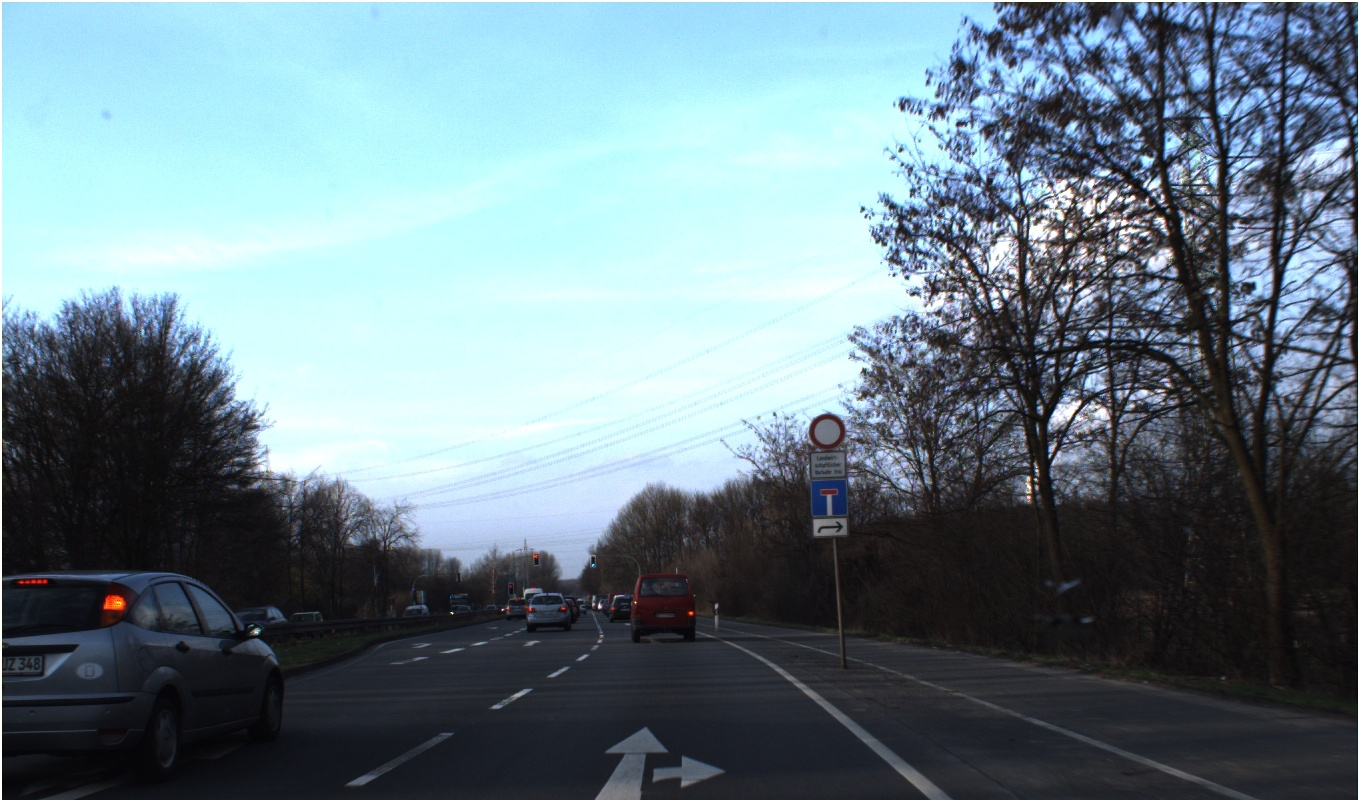

In [ ]:
Image(filename='/content/project/dataset/images/val/00896.jpg', width=416)

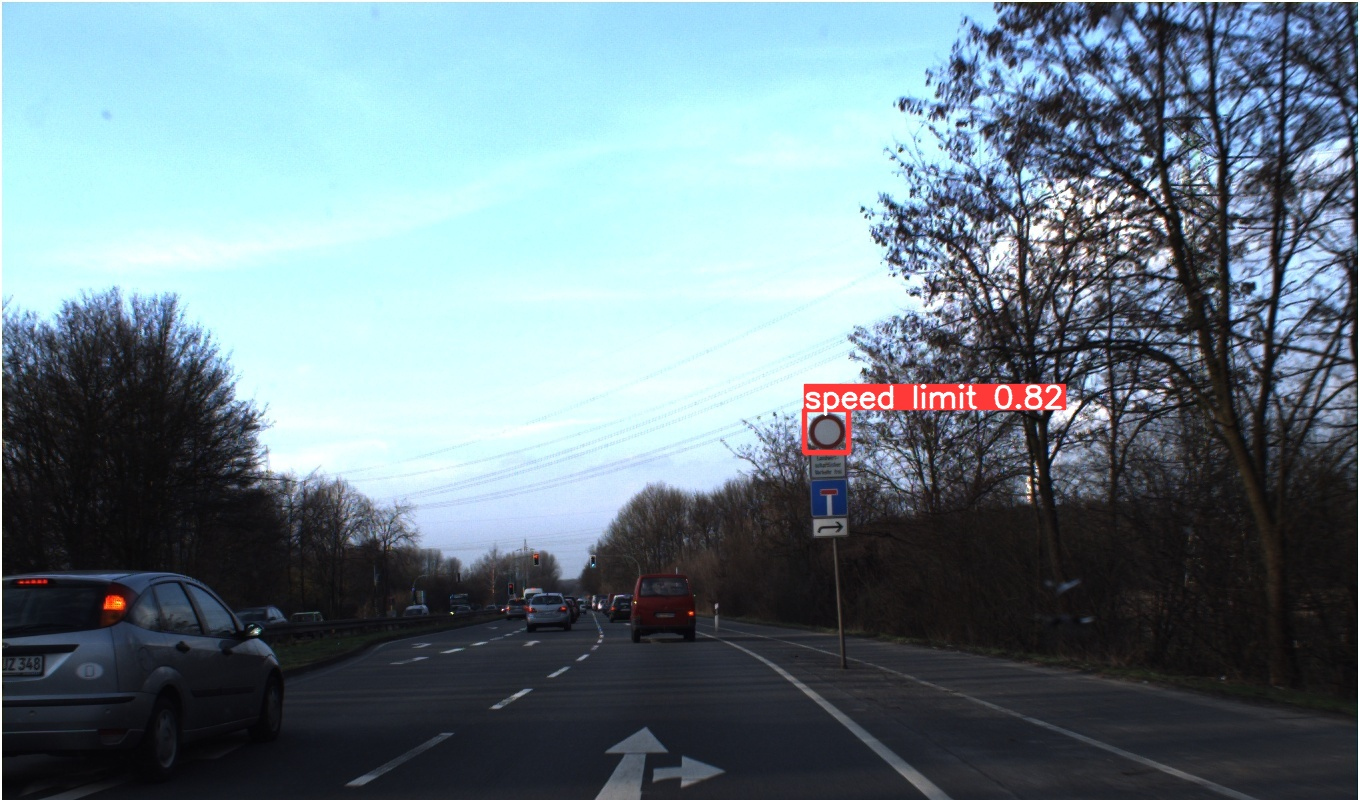

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp13/00896.jpg', width=416)

In [ ]:
!python detect.py --source /content/project/dataset/images/val/00857.jpg --weights /content/yolov5/runs/train/exp5/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/project/dataset/images/val/00857.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/project/dataset/images/val/00857.jpg: 384x640 1 speed limit, 1 other, 234.8ms
Speed: 2.7ms pre-process, 234.8ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp14


In [ ]:
!ls /content/yolov5/runs/detect/exp14

00857.jpg


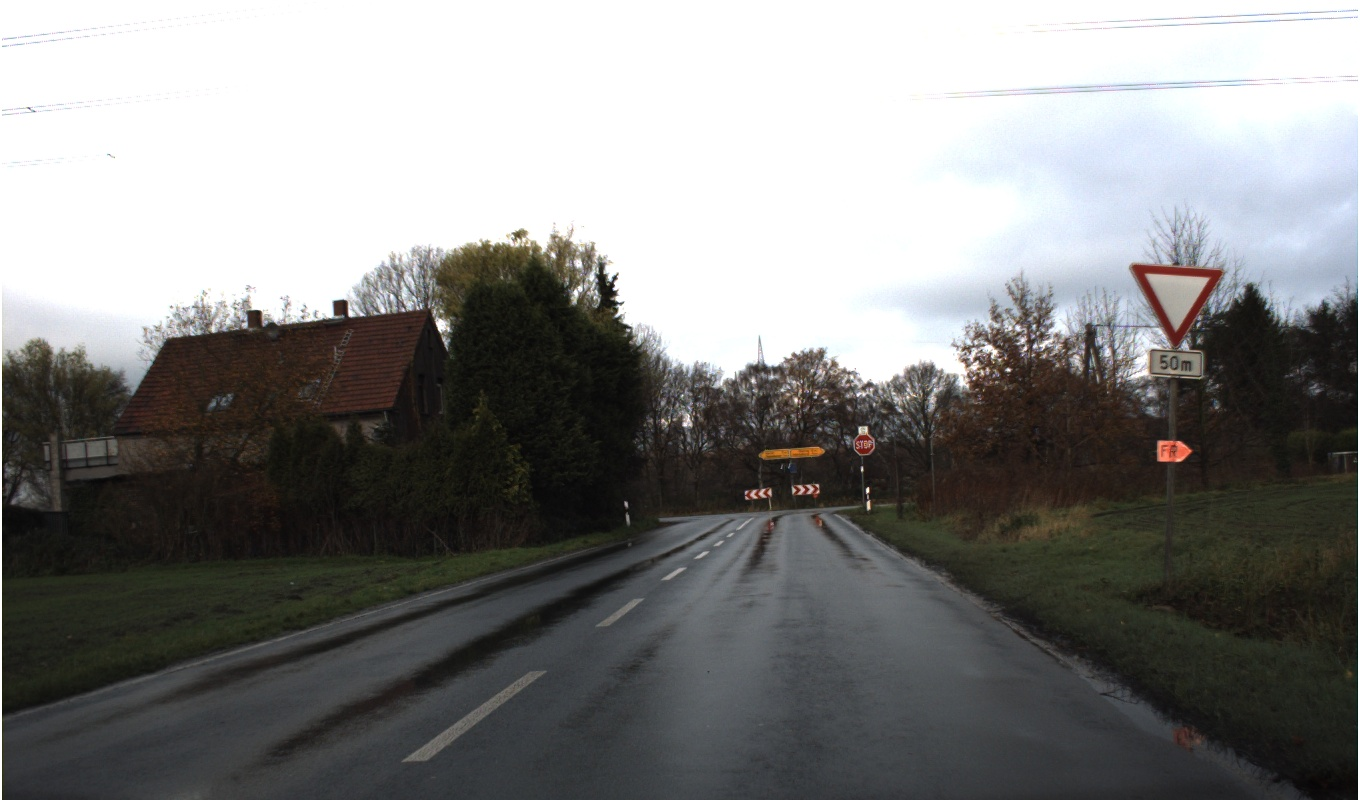

In [ ]:
Image(filename='/content/project/dataset/images/val/00857.jpg', width=416)

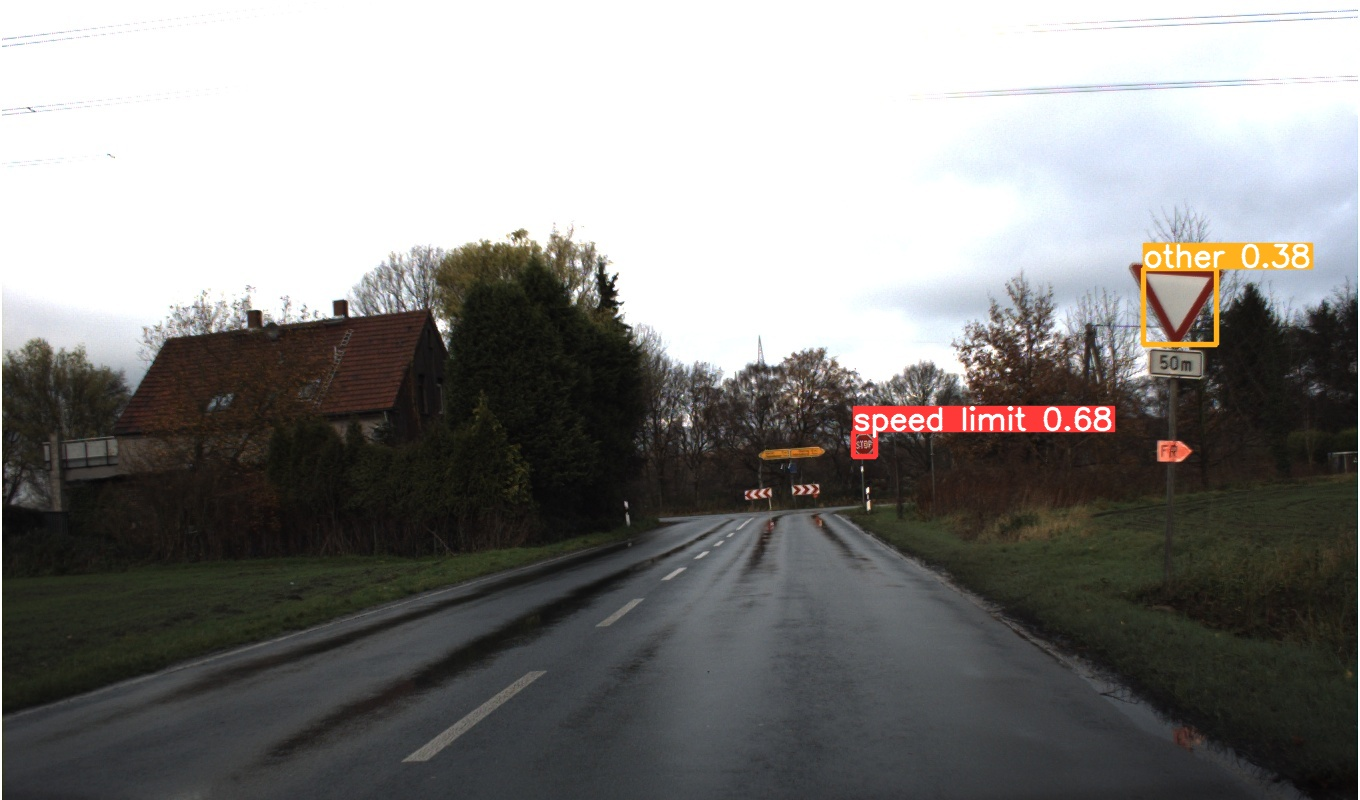

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp14/00857.jpg', width=416)